# Attack on RSA
In the following notebook we will firstly provide you with some basics of cryptography and more specific provide information about the RSA algorithm. Then we will use everything we have learned so far to perform a simple power analysis attack on a RSA encryption algorithm to retrieve the hidden key.

**Goals:**
* Learn basics of cryptograpgy (terminology, difference between symmetric and assymmetric)
* Learn how RSA works 
* Use a simple power analysis attack (SPA) to retrieve the hidden key.

#### Prerequisites
- [x] *0_series* notebooks 
- [x] *1_A - Correlation between tasks being performed by the target and its power consumption(SIMULATED)* notebook

## Cryptography basics

Cryptography is used to protect information so that you can send this information to someone else and that no third party will be able to understand the information that is being send. **Plain text** is used to describe the unprotected information being send. **Encrypted text** is the same information but after the plain text has been **encrypted**. The encrypted text is most of the times just a series of characters or numbers. With good encryption someone who has obtained the encrypted text (and isn't supposed to have the text) will not be able to convert the encrypted text back to the plain text. The intended receiver of the information can convert the encrypted text back to plain text by **decrypting** the information. The **decrypted text** is the original plain text again which can be read by the receiver.

But how are you able to encrypt and decrypt the information? There are two types of cryptography that are widely used: **symmetric cryptography** and **asymmetric cryptography**. We will firstly go over how symmetric cryptography works since it is a bit more straightforward to understand. 

### Symmetric encryption

<img src="../src/images/symmetric_crypto.png" alt="Symmetric encryption diagram" width=800>

Let's say we have a woman named Alice and she wants to send a message to Bob over the internet. (see diagram above to follow along) Alice does not want anyone else but Bob to be able to read the message, so she will encrypt the message. To encrypt the message Alice uses a secret key. In order for Bob to be able to decrypt the message he needs to have **the same** secret key. This is called symmetric cryptography because you use the same key to encrypt and decrypt the message. (How Alice and Bob are able to have the same secret key will be discussed later) It is important to note that the plain text is never send over the internet where other people can get their hands on it. 

### Asymmetric encryption

<img src="../src/images/asymmetric_crypto.png" alt="Asymmetric encryption diagram" width=800>

Now, let's see how Alice can send a message to Bob using asymmetric encryption. (You can again follow along in the diagram above) The use this type of encryption Bob needs to have two keys in order for Alice to send him a message. Bob has a **public key** which he broadcasts to everyone on the internet. Bob also has a **private key** that he <ins>doesn't share</ins> with anyone. Anyone who wants to send Bob a message now uses his public key to encrypt their message to Bob. As you can see Alice uses Bob's public key to encrypt her message. That encrypted message is then send to Bob over the internet. Bob receives the message and uses his own private key to decrypt the message.

An important difference with symmetric cryptography is that even Alice won't be able to decrypt the message. But this was possible with symmetric cryptography since encrytion and decrytion used the same key. So if Bob wants to send a reply he needs to use Alice's public key and she will use her private key to decrypt the message.

### Some extra info
To perform the encryption and decryption a lot of the times mathematical formulas are used. In order to easily use these formulas, the plain text is presented as a number. Luckily text on a computer is nothing more than a big binary number. The keys that we have spoken of in the example are also just some binary numbers (as you will see in the rest of the tutorials).

You might still be wondering how Alice and Bob, with symmetric cryptography, can have the same key without anyone knowing. Well you know there is also a thing called asymmetric cryptography where we don't have this issue. Combined with the fact that asymmetric cryptography usually takes longer than symmetric cryptography, it is not hard to understand that in the real world Bob and Alice would firstly use asymmetric cryptography to send each other the secret key used for symmetric cryptography. Once they securely have the same key, they can use the faster symmetric cryptography to send large messages to each other.

We have only showed you the tip of the iceberg here so if you want to learn more about cryptography a link to videolectures about the topic is provided here: [Videolectures of Christof Paar](https://www.youtube.com/channel/UC1usFRN4LCMcfIV7UjHNuQg/videos)

### Implementation of cryptography
The process of encrypting and decrypting text input can be programmed using software. You can also program a microcontroller for example on which you can set a key. When you send some input to the microcontroller it automatically encrypts the input using the stored key and returns the encrypted output. This is exactly how our target (the XMEGA 8-bit) works. By using a programmer we can program different kinds of encryption algorithms onto the device.

### Are cryptosystems secure?
Modern encryption algorithms are theoretically uncrackable. This means that without having the correct key you will never be able to convert the encrypted text back to plain text (with the current computing speed). However, the implementation of the algorithms in software and/or hardware can introduce weaknesses that we are going to exploit to find the key. Once we have the key we are able to decrypt every piece of encrypted text. What those weaknesses are, you will learn about in the following tutorials. There also exist countermeaseures that can be used in the implementation of the algorithm to prevent people from using these weaknesses to crack the algorithm. 

## RSA (Rivest - Shamir - Adleman) Cryptosystem
The first widely used encryption standard we are going to crack is RSA. It is an assymetric cryptosystem. The algorithm itself is not that simple but an attack we can use to crack it is very simple. (note that this simple attack does not work for all implementations of the RSA algorithm) As mentioned before, RSA is an asymmetric type of crytography which means it uses a public key and a private key. On top of those two keys we also need a public number (the modulo) that is used in conjunction with both the public and private key to encrypt and decrypt messages.

```
    P : the binary code representing the plain text (the decrypted text will be the same of course)
    C : the binary code representing the encrypted text (also called cipher text)
    d : the private key (just a binary number)
    e : the public key (just a binary number)
    N : the modulo (just a binary number)
    
```
To get the encrypted text, following mathematical formula is used:

$C = P^e mod N$

To decrypt the cypher text back into the plain text, the same mathematical formula is used but instead of using the public key (e) you use the private key (d):

$P = C^d mod N$

Keep in the back of your mind that all numbers and text are just binary numbers. To perform the operation above the following code *can* be used where the function has the following parameters (cypher text = C, private key = d, modulo = N):
```
    output = 1;
    
    for (every bit in d starting from MSB) {
        
        output = output * output mod N;     //perform a square operation
        
        if (bit is 1){                      //perform an extra operation
            output = output * input mod N;  //perform a multiply operation
        }
    }
    return output;
```

The output is then the plain text P.

If you watch closely, you can see that inside the for-loop an extra instruction is performed everytime the bit of the private key is a `1`. As we have seen in earlier lessons this will show up on the power measurements trace. The start of each loop through the for-loop will have a distict form. We can then assume that the amount of time that elapses between two passes of the for-loop will be different when the bit is a `1` or a `0` since the target needs to perform an extra operation when it's a `1`. So if we analyse the power trace and measure the time between passes of the for-loop we can see if the bit of the secret key was a `1` or a `0`.
Congratulations you just found someone's **private key** by just looking at the power consumption of the target. 

Using external factors like *power consumption*, *electromagnetic radiation*, *clock pulses* ... to find the hidden key is the definition of a **Side Channel Analysis Attack**. Since we used a simple analysis of the power consumption to crack the code, this attack is called a **Simple Power Analysis** attack (SPA). 

* *In the supplemental reading you will find a link to two videos that work out a simple example of the RSA algorithm and also show the relationship between the public and private key*

## Performing the attack
### Communicating with target
The target board we are using (XMEGA) comes with some limitations regarding the RSA algorithm. We can't set the keys for the encryption that the microcontroller will perform. Instead the text we sent to the target will be used as the plain text as well as the encryption key itself. So sending `0xB04` (hexcode B04) to the target will mean that `0xB04` is the plain text as well as the key (which will be the exponent). Furthermore the target will only 'encrypt' the message. But as we saw earlier 'encrypting' and 'decrypting' with RSA is the same exact series of operations. The only difference being the key used. We can thus look at the text we sent to the target as the cypher text and look at the key as the private key we want to find. 

Another limitation is the length of our trace array. We will only capture 24000 measurement points. If our key is too long we won't be able to measure all passes of the for-loop. To work around this we are going to use a short key. To tell the target we are only using an 16-bit long key, we will let all leading bits of the 12-bit key be `0`'s. (Since our key is our plain text and vice versa our plain text will also just be 12-bits long).

The final limitation is that the target will perform the encryption internally, but it won't send back the result. So the only way we can see if it really is performming as aspected is to send two different inputs to the target, capture the traces and analyzing the results.

#### Forming a hypothesis
The texts we will send to the device are `0xB0F` as text1 and `0xB04` as text2. 
```
    0xB 0F = 0b1011 0000 0111
    0xB 04 = 0b1011 0000 0100
```
Let's try to make some assumptions of what the traces will look like. Since the first 8 bits of the key are the same we expect to see the same trace shape at the start. We can also expect to see 12 distinct shapes that coincides swith the 12 rounds through the for-loop since both keys consist of 12 bits. Lastly we can predict that the total 'time' of the for-loop of the first text will be longer than the second because the first key has more `1`'s. And we already saw that processing a `1` contains an extra operation, which means it takes longer. 
#### Testing our hypothesis
With the following code block below we will plot the two power traces we have already recorded for you:

<IPython.core.display.Javascript object>


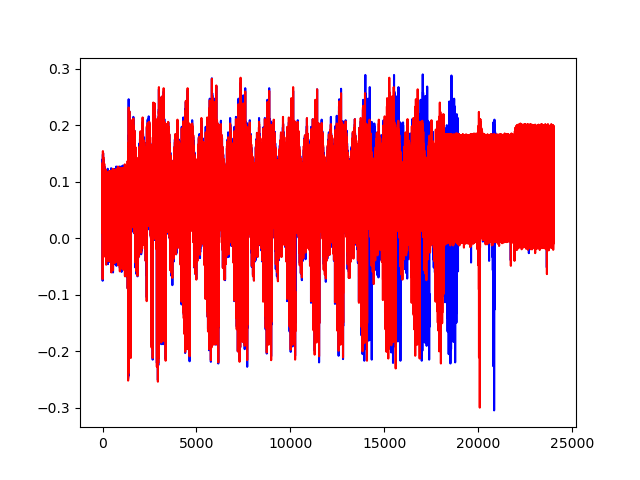

In [1]:
%matplotlib notebook
import matplotlib.pylab as plt
import numpy as np

text1 = bytearray([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0x0B, 0x0F])
# 0xB0F = 0b1011 0000 1111
trace1 = np.load('./../src/sim_files/1B_1-trace1.npy')
plt.plot(trace1, 'b')

text2 = bytearray([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0x0B, 0x04])
# 0xB04 = 0b1011 0000 0100
trace2 = np.load('./../src/sim_files/1B_2-trace2.npy')
plt.plot(trace2, 'r')

#### Drawing conclusions
In the plot above the trace of text1 is plotted in blue and the trace of text2 in red. We can clearly see a sequence repeating about 12 times and that the red and blue trace are indentical in the beginning. We also see the repeating pattern of the red trace stops sooner. So are hypotheses seem to be confirmed.

### Building up the attack
For the attack we are going to analyse the trace of text2. Next code block will show you the traces of text2 seperately:

<IPython.core.display.Javascript object>


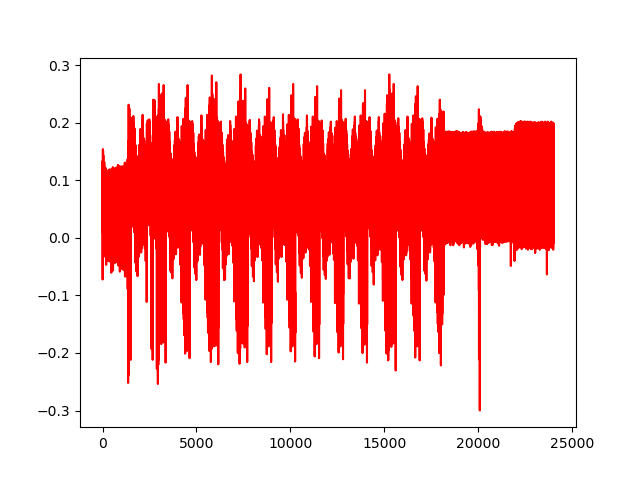

In [2]:
%matplotlib notebook
trace = trace2
plt.figure()
plt.plot(trace, 'r')
plt.show()

As we mentioned earlier we must use this trace to measure the time between each pass through the for-loop. Those times can be put into two categories: long and short. 

In order to do so, let's first try to identify which part of the trace signals the start of a for loop. In other words, look at the trace and determine a `beginning_index` and an `ending_index` that creates a subarray of the trace containing a distinct part of the for-loop (a series of measurements that returns each pass through the loop). Write the code in the textblock below to create that subarray and call the variable `signature`:

In [3]:
# write your code below this line:
###BEGIN SOLUTION###
start_index = 9100
end_index = 9900
signature = trace[start_index:end_index]
###END SOLUTION###

The following step is to compare this subarray to every other subarray of the same length in the trace. If the comparison is good enough we keep the index where the match occurred since this signals the start of a pass through the for-loop. If we took the correct `signature` array we should find 12 matches. Now we must ask ourselves an important question: how can we compare two array's to find out how identical they are?

#### Sum of Absolute Differences

To do this we are going to calculate the **sum of absolute differences** (SAD). To calculate this, we calculate the difference between each value at the same index and store the result in an array at the corresponding index. Next we take the absolute value of everything in the new array (otherwise positive and negative differences will cancel each other out). Lastly we compute the total sum of the array and this will give us a numerical value of the comparison between the arrays. The lower the SAD value, the more two arrays are identical. Let's use this technique on a quick example
```
    original_array         = [3,8,4]
    array_to_compare_to_1  = [3,7,4]
    array_to_compare_to_2  = [5,7,2]
    
    SAD_original_and_1 = |3-3| + |8-7| + |4-4| = 1
    SAD_original_and_2 = |3-5| + |8-7| + |4-5| = |-2| + |1| + |2| = 5
    
    Conclusion: the original array is more identical to array_1 than array_2.
    
```
In the following code block try to complete the code for the `SAD` function that takes two arrays (of the same length) and returns their SAD value. Use that function on the example above to test if your code works:

In [4]:
import numpy as np

def SAD(array1, array2):
    # Write your code here
    ###BEGIN SOLUTION###
    diff = array1-array2
    return np.sum(abs(diff))
    ###END SOLUTION###
    
original_array         = np.array([3,8,4])
array_to_compare_to_1  = np.array([3,7,4])
array_to_compare_to_2  = np.array([5,7,2])

assert SAD(original_array, array_to_compare_to_1) == 1
assert SAD(original_array, array_to_compare_to_2) == 5
print("✔️ OK to continue!")

✔️ OK to continue!


Well done! Now you need to write some code to let the `signature` array sweep over the original trace array. Calculate the SAD at each point and store the result into a new array called `sad_results`. So the value of `sad_result[0]` will be the SAD value of `signature` and `trace[0:len(signature)]`, the value of `sad_result[1]` will be the SAD value of `signature` and `trace[1:len(signature)+1]`, ... Make sure you stop in time: (Put this in another function that takes the `trace` array as the first parameter and the `signature` array as the second. Call the function `sad_sweep` and let it return the `sad_result` array)

In [5]:
def sad_sweep(trace,signature):
    # Write your code below this line
    
    ###BEGIN SOLUTION###
    sad_result = np.array([])
    for i in range(len(trace)-len(signature)+1):
        sad_value = SAD(signature, trace[i:i+len(signature)])
        sad_result = np.append(sad_result,sad_value)
    return sad_result
    ###END SOLUTION###

# The following assertion will test your code:
example_trace = np.array([1,2,3,4,5,6])
example_signature = np.array([3,4])
example_result = np.array([4,2,0,2,4])
for i in range(len(example_result)-1):
    assert example_result[i] == sad_sweep(example_trace,example_signature)[i]
print("✔️ OK to continue!")

✔️ OK to continue!


To visualize a bit of what we are doing you can run the next block. The block creates an interactive plot with which you can sweep the signature array over the trace array and see the SAD value at each position.

In [6]:
import ipywidgets as widgets
from IPython.display import display
%matplotlib inline

@widgets.interact(offset=(0, len(trace)))
def plotsad(offset=start_index):
    plt.plot(trace, 'r')
    plt.plot(range(offset, offset+len(signature)), signature, 'b', alpha=0.6)
    plt.figure()
    print("The SAD value at pos "+str(offset)+" is "+str(SAD(signature, trace[offset:offset+len(signature)])))

interactive(children=(IntSlider(value=9100, description='offset', max=24000), Output()), _dom_classes=('widget…

The next step is to plot all the values in the `sad_sweep` and if we did everything correctly we should see the plot dip to low values 12 times. These times should correspond to the 12 times the for-loop is executed:

<IPython.core.display.Javascript object>


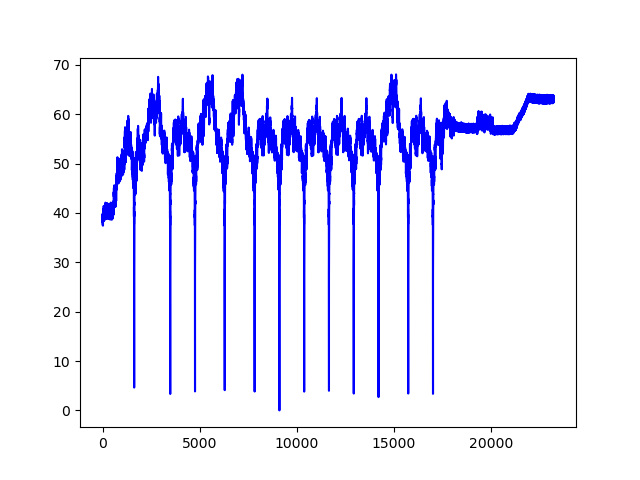

In [7]:
%matplotlib notebook
sad_sweep_results = sad_sweep(trace,signature)
plt.figure()
plt.plot(sad_sweep_results, 'b')
plt.show()

We are almost there. We can even see where the microcontroller is processing a `1` or a `0` already. To write code to deduce the proper bit automatically we will use a threshold value for the appropriate SAD value.
Using the plot above we can choose a threshold value. We use this threshold to determine the position of a pass through the for-loop. Looking at the graph we clearly see 12 spikes below the value of 10. This will be our threshold. In the block below write code that loops through the array and when the value, at a certain index i, is smaller than the threshold we append that index to a new array (`positions`).

In [ ]:
threshold = 10
positions = np.array([])
# insert your code below this line
###BEGIN SOLUTION###
for i in range(len(sad_sweep_results)-1):
    if(sad_sweep_results[i] < threshold):
        positions = np.append(positions,i)
print(positions)
###END SOLUTION###

The next step is to measure the time between each point (the difference between 2 following values). We are going to store the results in an array called `intervals` and we will plot these times in a graph:

In [ ]:
intervals = []
for i in range(0, len(positions)-1):
    interval = positions[i+1] - positions[i]
    intervals.append(interval)
    
plt.figure()
plt.plot(intervals, range(0, len(intervals)), 'or')
plt.grid(True)
plt.title('A Learned Comparison of RSA Execution Time')
plt.ylabel('Processing Bit Number')
plt.xlabel('Time Delta (based on SAD Match)')
plt.show()

You might ask yourself the question why there are only 11 points when we should be seeing 12 passes through the for-loop. This is because we can't measure the timing of the last pass through the for-loop since we use the 'beginning signature' of the next pass to determine the time this pass. But because there is no next pass through the for-loop the last time, we don't know its timing so we can't know the value of the bit. You can just try `0` and `1` and see which works best.

For all other bits we can again use a threshold value to determine automatically if a bit was a `1` or a `0`. In our case, if an interval was smaller than 1400 it was a `0` and if it is larger it is a `1`.

In [ ]:
key = ""
threshold2 = 1400
# Write your code below this line
###BEGIN SOLUTION###
#get the main body of the key

for i in range(0, len(intervals)):
    if intervals[i] > threshold2:
        key += "1"
    else:
        key += "0"
key += "0" # maybe this is ot correct but it is only 1 bit. So if '0' doesn't work the right answer is '1'
###END SOLUTION###
print(key)
print("I think the real key is : " + hex(int(key,2)))

## Wow, good job!
the last thing to do is just compare our result against the actual text we sent to the target at the beginning. Hopefully it is the same. Good job! You have succesfully cracked the RSA code using a SPA attack.

You can also try to crack some other values for the key by editing the bytearray of text2. Remember that the trace will change so you need to find a new `start_index` and `end_index` for the `signature` array if you want to perform a successful attack.

You might think that this was too easy but if you implement an algorithm naively it can be vulnerable to this kind of 'simple' attacks. In the last couple of lessons we will learn how to take countermeasures against this attack though.

## Next step
Now you know or can:
* the basics of cryptograpgy
* what the RSA cryptosystem is
* how to crack RSA using SPA
* capture powermeasurements with the chipwhisperer into a list

Next on the menu is AES, a symmetric cryptosystem.

**Next notebook click here: [2_A - DPA on AES cryptosystem(SIMULATED).ipynb](./2_A%20-%20DPA%20on%20AES%20cryptosystem(SIMULATED).ipynb)**

### Supplemental Reading
* Calculating of a simple example of the RSA cryptosystem and explanation of the relation between public and private key: [Part 1](https://www.youtube.com/watch?v=4zahvcJ9glg), [Part 2](https://www.youtube.com/watch?v=oOcTVTpUsPQ)